In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandata109.xlsx', index_col=0)

In [3]:
identifier_columns = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg','interpreting_process_avg', 'straightforward_process_avg','avgscore']

In [4]:
df_feelings = df[identifier_columns+positive_feelings_in_school]

In [5]:
pivot_df_feelingsinschool = df_feelings.pivot_table(values=positive_feelings_in_school, index=identifier_columns, aggfunc='mean')

In [6]:
pivot_df_feelingsinschool

ASBG10A   ASBG10B   ASBG10C   ASBG10D   ASBG10E  \
Country     ASBH02A                                                     
Austria     No       1.759465  1.570470  1.584650  1.525843  1.373034   
            Yes      1.826697  1.577666  1.442907  1.426694  1.369663   
Egypt       No       1.403226  1.571429  1.540426  1.516949  1.521186   
            Yes      1.332351  1.472121  1.429911  1.404374  1.371104   
France      No       1.627119  1.703863  1.538793  1.914530  1.480851   
            Yes      1.768795  1.718054  1.462446  1.935719  1.549091   
Germany     No       1.568966  1.544379  1.534884  1.530120  1.434524   
            Yes      1.705419  1.468125  1.348620  1.315101  1.352225   
Jordan      No       1.222574  1.301384  1.257511  1.266234  1.197425   
            Yes      1.236234  1.299590  1.282793  1.283689  1.225996   
Netherlands No       1.538462  1.384615  1.649351  1.153846  1.243590   
            Yes      1.571354  1.386827  1.482162  1.157344  1.313838   
Sweden      No       1.644295  1.450512  1.665517  1.391156  1.494774   
            Yes      1.814129  1.414367  1.552222  1.383390  1.552511   

                      ASBG10F  
Country     ASBH02A            
Austria     No       1.170404  
            Yes      1.095739  
Egypt       No       1.461538  
            Yes      1.305961  
France      No       1.175214  
            Yes      1.129806  
Germany     No       1.257485  
            Yes      1.106132  
Jordan      No       1.285866  
            Yes      1.240332  
Netherlands No       1.166667  
            Yes      1.085162  
Sweden      No       1.202703  
            Yes      1.111747

In [7]:
# Calculate the total average for each row
pivot_df_feelingsinschool['MeanTotal'] = pivot_df_feelingsinschool[['ASBG10A','ASBG10B','ASBG10C','ASBG10D','ASBG10E','ASBG10F']].mean(axis=1)

# Sort countries by the total average
country_averages = pivot_df_feelingsinschool.groupby('Country')['MeanTotal'].mean().sort_values(ascending=True).index.tolist()

### Create a custom sorter for ASBH02A
asbh02a_sorter = ['Yes', 'No']

In [8]:
# Get the current index as a DataFrame for sorting
index_df = pivot_df_feelingsinschool.index.to_frame()

In [9]:
index_df

Country ASBH02A
Country     ASBH02A                     
Austria     No           Austria      No
            Yes          Austria     Yes
Egypt       No             Egypt      No
            Yes            Egypt     Yes
France      No            France      No
            Yes           France     Yes
Germany     No           Germany      No
            Yes          Germany     Yes
Jordan      No            Jordan      No
            Yes           Jordan     Yes
Netherlands No       Netherlands      No
            Yes      Netherlands     Yes
Sweden      No            Sweden      No
            Yes           Sweden     Yes

In [10]:
# Rename the columns to avoid conflict
index_df = index_df.rename(columns={'Country': 'Country_', 'ASBH02A': 'ASBH02A_'})

# Sort the DataFrame first by Country using the sorted_countries and then by ASBH02A using the custom sorter
index_df['Country_'] = pd.Categorical(index_df['Country_'], categories=country_averages, ordered=True)
index_df['ASBH02A_'] = pd.Categorical(index_df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
index_df = index_df.sort_values(by=['Country_', 'ASBH02A_'])

# Reindex the pivot table using the sorted index
sorted_pivot_df = pivot_df_feelingsinschool.loc[index_df.index]

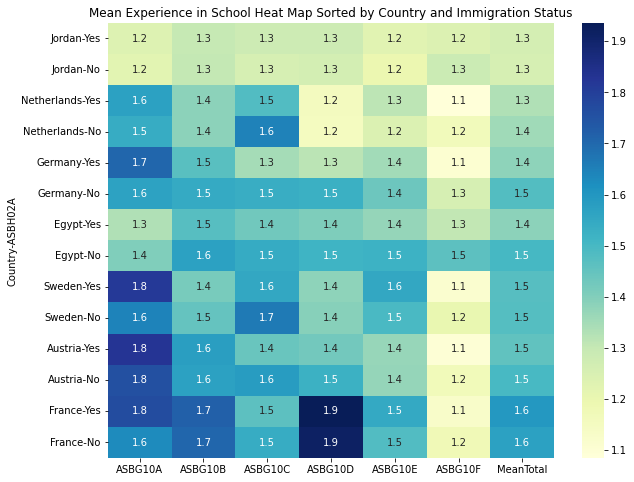

In [11]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_df, annot=True, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

 1: Agree a lot; 2: Agree a little; 3: Disagree a little; 4: Disagree a lot\
 
ASBG10A	GEN\AGREE\BEING IN SCHOOL\
ASBG10B	GEN\AGREE\SAFE AT SCHOOL\
ASBG10C	GEN\AGREE\BELONG AT SCHOOL\
ASBG10D	GEN\AGREE\TEACHERS ARE FAIR\
ASBG10E	GEN\AGREE\PROUD TO GO TO SCHOOL\
ASBG10F	GEN\AGREE\FRIENDS AT SCHOOL

lighter colours are better